<a href="https://colab.research.google.com/github/syamkakarla98/Hyperspectral_Image_Analysis_Simplified/blob/master/1D_CNN/Land_cover_classification_of_satellite_imagery_using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'tomato'>Land cover classification of satellite imagery using Convolutional Neural Networks</font>

## Download Data


In [2]:
%cd /content/drive/MyDrive

# !wget http://www.ehu.eus/ccwintco/uploads/a/a3/Salinas_corrected.mat http://www.ehu.eus/ccwintco/uploads/f/fa/Salinas_gt.mat


/content/drive/MyDrive


## Import Libraries

In [3]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 95.4 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)

## Load Data

In [6]:
data = loadmat('/content/sample_data/Salinas_corrected.mat')['salinas_corrected']

gt = loadmat('/content/sample_data/Salinas_gt.mat')['salinas_gt']

print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands: {data.shape[-1]}')

Data Shape: (512, 217)
Number of Bands: 204


In [7]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [8]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band196,band197,band198,band199,band200,band201,band202,band203,band204,class
0,290,381,585,1041,1316,1397,1319,1462,1643,1683,...,96,109,93,54,79,54,36,11,17,0
1,290,381,519,1041,1316,1352,1319,1462,1643,1683,...,94,111,96,56,83,56,36,11,15,0
2,290,381,585,1041,1286,1352,1300,1412,1614,1644,...,88,107,89,54,81,54,30,11,11,0
3,290,381,585,999,1316,1374,1280,1380,1584,1631,...,86,105,85,56,75,50,30,11,19,0
4,219,381,585,999,1286,1352,1261,1396,1555,1618,...,83,105,83,48,75,50,24,9,17,0


### Description of Classes

|Label |Class	|Samples|
|------|------|-------|
1|	Brocoli_green_weeds_1	|2009
2|	Brocoli_green_weeds_2	|3726
3|	Fallow	|1976
4	|Fallow_rough_plow|	1394
5	|Fallow_smooth	|2678
6|	Stubble	|3959
7	|Celery	|3579
8	|Grapes_untrained	|11271
9	|Soil_vinyard_develop|	6203
10|	Corn_senesced_green_weeds|	3278
11|	Lettuce_romaine_4wk	|1068
12|	Lettuce_romaine_5wk	|1927
13|	Lettuce_romaine_6wk	|916
14|	Lettuce_romaine_7wk	|1070
15|	Vinyard_untrained|	7268
16|	Vinyard_vertical_trellis|	1807



## Data Visualization

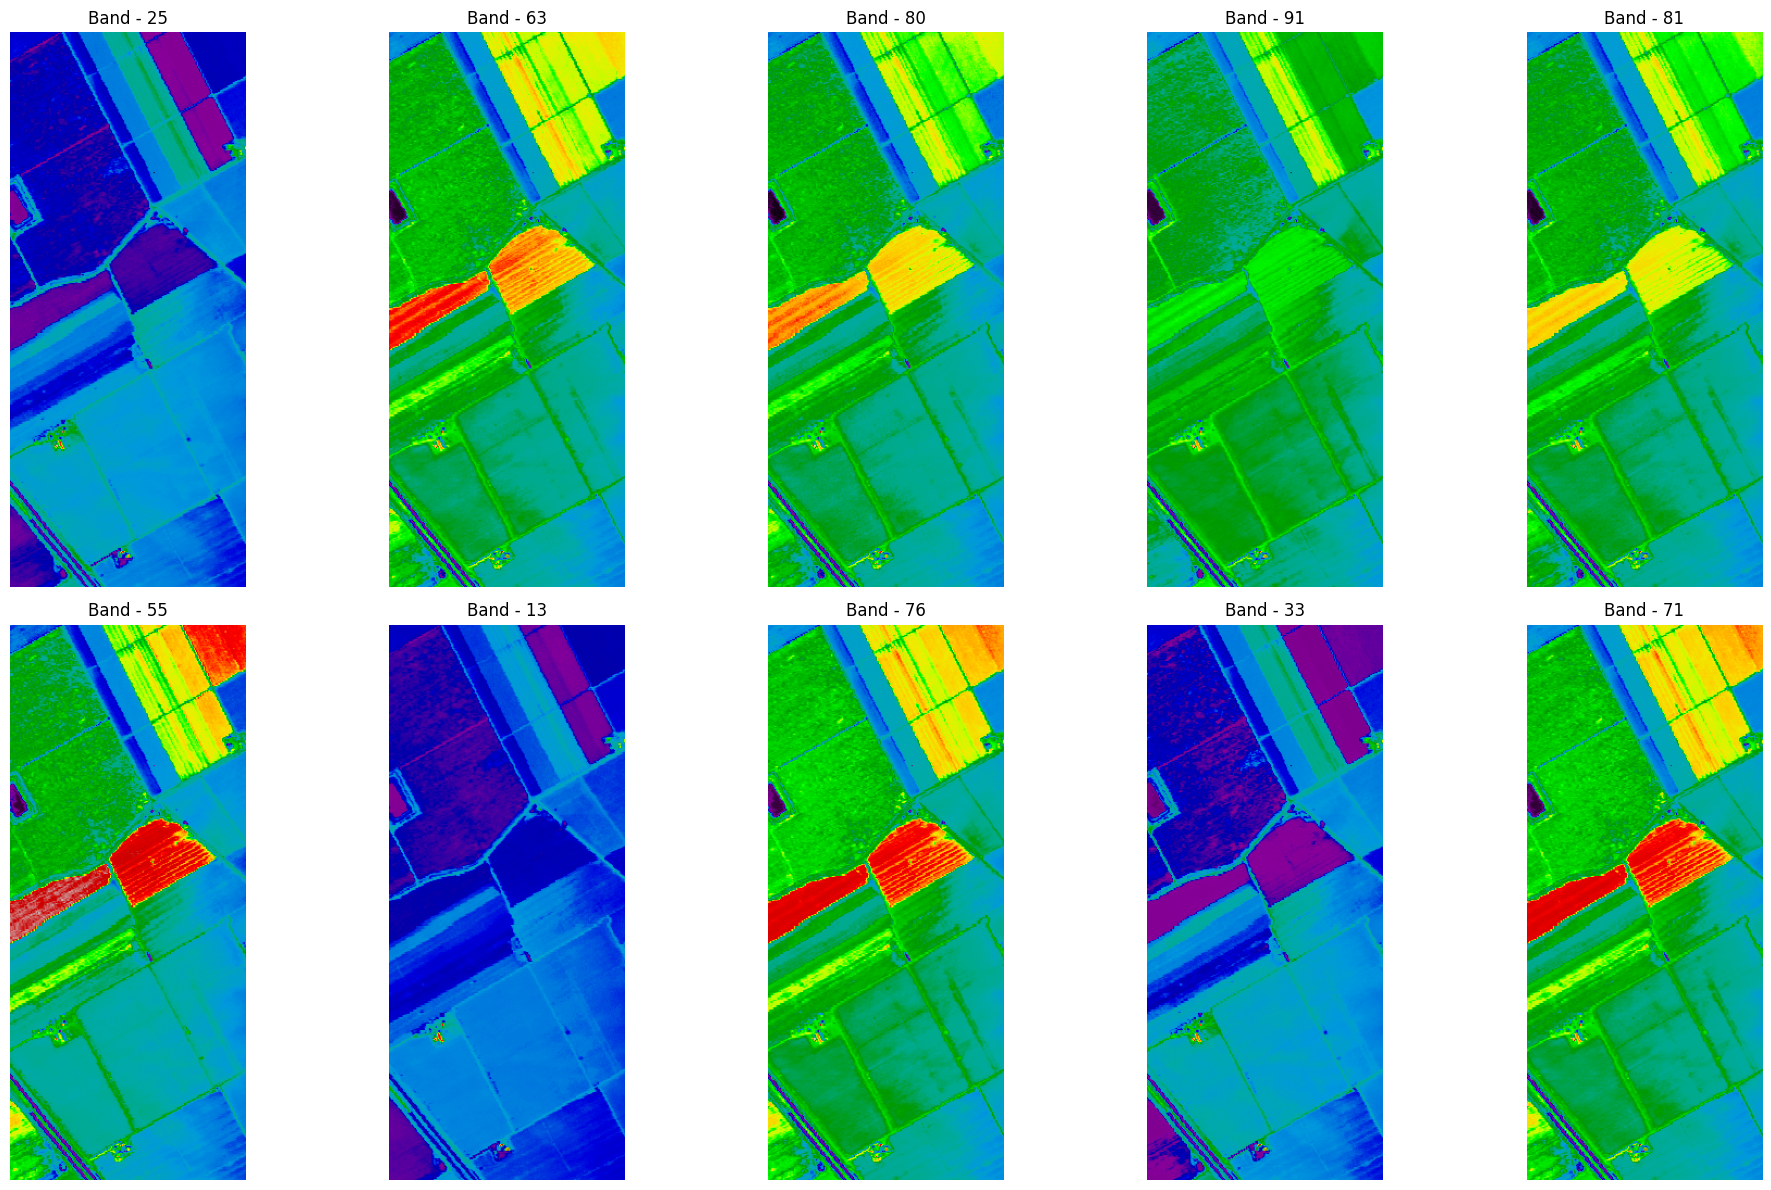

In [9]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()
plt.show()


## RGB Composite Image

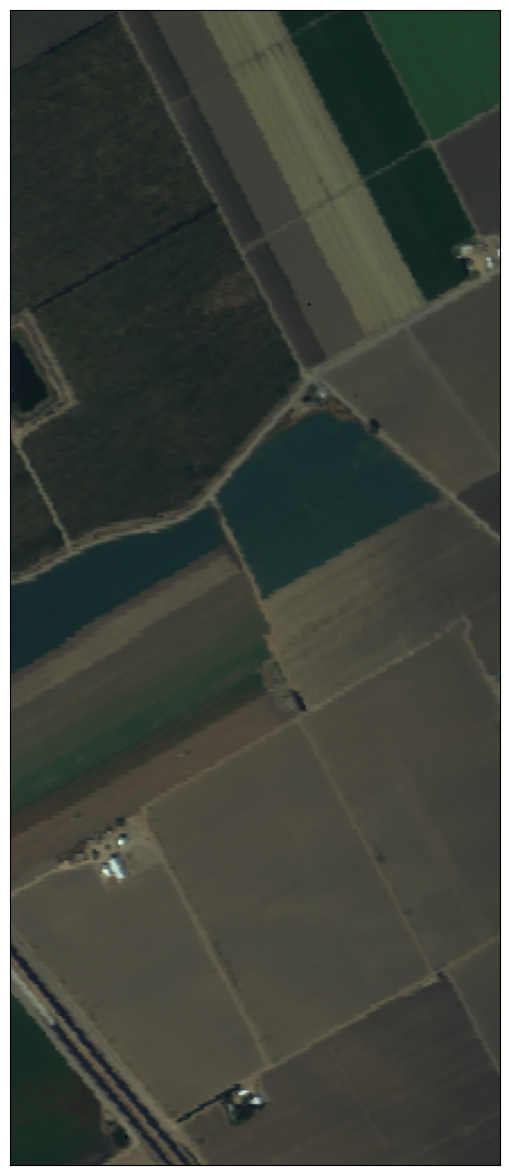

In [10]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (29, 19, 9), figsize=(15, 15))

plt.show()

## GroundTruth Visualizaation

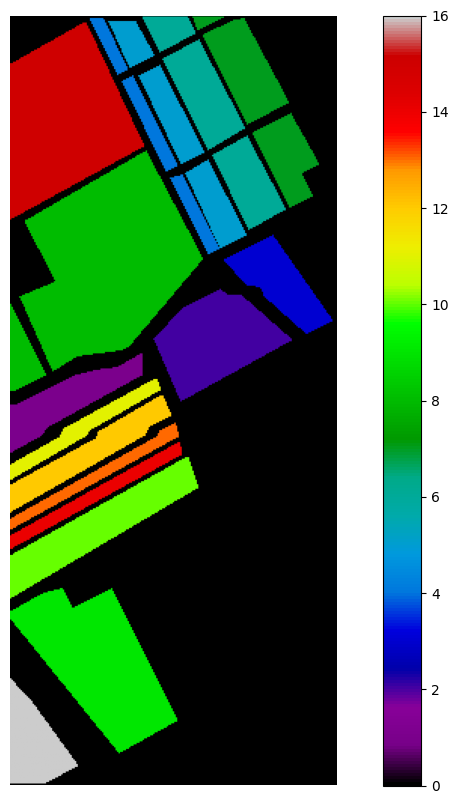

In [11]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)